<a href="https://colab.research.google.com/github/falawar7/AAI_633O/blob/main/Week3/FE_Building_a_Simplified_Transformer_Encoder_R1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 3 Hands-on Lab: Building a Simplified Transformer Encoder**

This hands-on lab allows you to understand the Transformer architecture by implementing a basic Transformer encoder. You will learn how input embeddings, positional encodings, and feedforward layers work together in an encoder block. We will be using the Torch framework to build a simple transformer encoder.

**Part 4: Experiment with Different Inputs**

* Test with Different Sentences
Replace token_ids with new examples to observe how the encoder processes different inputs.
* Modify Hyperparameters
Experiment with different embedding sizes, feedforward dimensions, or positional encoding scales to see their effect on the output.


# **Part 4_1: Input Embedding and Positional Encoding**

**1.	Generate Input Data**
Define a sample sentence and tokenize it into a numerical format.


In [1]:
import torch
import torch.nn as nn
import numpy as np

# Example sentence and token IDs (simplified for illustration)
token_ids = torch.tensor([[17, 8, 11, 19, 5, 4, 2, 15]])   # Tokenized sentence
vocab_size = 20  # Vocabulary size
embedding_dim = 10  # Embedding size

**2. Create an Embedding Layer**
Implement the embedding layer to convert token IDs into dense vectors.

In [2]:
embedding_layer = nn.Embedding(vocab_size, embedding_dim)
embedded_tokens = embedding_layer(token_ids)
print("Embedded Tokens:\n", "token_ids:\n", embedded_tokens)

Embedded Tokens:
 token_ids:
 tensor([[[-0.9564,  0.0681, -0.3828,  0.4680,  0.3683,  1.7594,  0.8239,
          -1.5459,  1.3792,  1.0745],
         [-1.6046,  1.0596, -1.3929, -1.2296, -0.9955,  2.7657, -0.4056,
           0.4048,  0.3895, -1.7138],
         [-0.4226, -1.0429, -0.7781,  0.8351,  0.4861,  2.0084,  1.1461,
          -1.5213,  0.4154,  0.1986],
         [ 0.1045, -0.7121,  1.1427, -1.5394, -1.0351,  1.1304, -0.9894,
          -0.7234,  0.6054,  1.1741],
         [-0.0683, -1.2189, -1.5252,  0.4051, -0.5403,  0.3217,  0.4208,
           1.6619, -0.9858, -2.0451],
         [ 0.2371,  0.2566, -0.9778,  0.4308,  0.5716, -0.0796, -0.1955,
           1.2663,  0.6869,  0.7762],
         [-0.1107,  0.7953, -1.6934, -0.5239, -0.6334, -0.1068,  1.5417,
          -1.6447,  0.7425,  0.0159],
         [-1.1355,  2.2814, -0.6282, -1.9264, -0.6962, -1.0660,  0.2784,
           0.5125,  0.2054, -0.5017]]], grad_fn=<EmbeddingBackward0>)


In [3]:
for i in range(token_ids.shape[1]):
  print(f"Token ID: {token_ids[0][i]}")
  print(f"Embedding: {embedded_tokens[0][i]}")

Token ID: 17
Embedding: tensor([-0.9564,  0.0681, -0.3828,  0.4680,  0.3683,  1.7594,  0.8239, -1.5459,
         1.3792,  1.0745], grad_fn=<SelectBackward0>)
Token ID: 8
Embedding: tensor([-1.6046,  1.0596, -1.3929, -1.2296, -0.9955,  2.7657, -0.4056,  0.4048,
         0.3895, -1.7138], grad_fn=<SelectBackward0>)
Token ID: 11
Embedding: tensor([-0.4226, -1.0429, -0.7781,  0.8351,  0.4861,  2.0084,  1.1461, -1.5213,
         0.4154,  0.1986], grad_fn=<SelectBackward0>)
Token ID: 19
Embedding: tensor([ 0.1045, -0.7121,  1.1427, -1.5394, -1.0351,  1.1304, -0.9894, -0.7234,
         0.6054,  1.1741], grad_fn=<SelectBackward0>)
Token ID: 5
Embedding: tensor([-0.0683, -1.2189, -1.5252,  0.4051, -0.5403,  0.3217,  0.4208,  1.6619,
        -0.9858, -2.0451], grad_fn=<SelectBackward0>)
Token ID: 4
Embedding: tensor([ 0.2371,  0.2566, -0.9778,  0.4308,  0.5716, -0.0796, -0.1955,  1.2663,
         0.6869,  0.7762], grad_fn=<SelectBackward0>)
Token ID: 2
Embedding: tensor([-0.1107,  0.7953, -1.693

In [4]:
print(f"Input shape: {token_ids.shape}")
print(f"Output embeddings shape: {embedded_tokens.shape}")

Input shape: torch.Size([1, 8])
Output embeddings shape: torch.Size([1, 8, 10])


In [5]:
import matplotlib.pyplot as plt

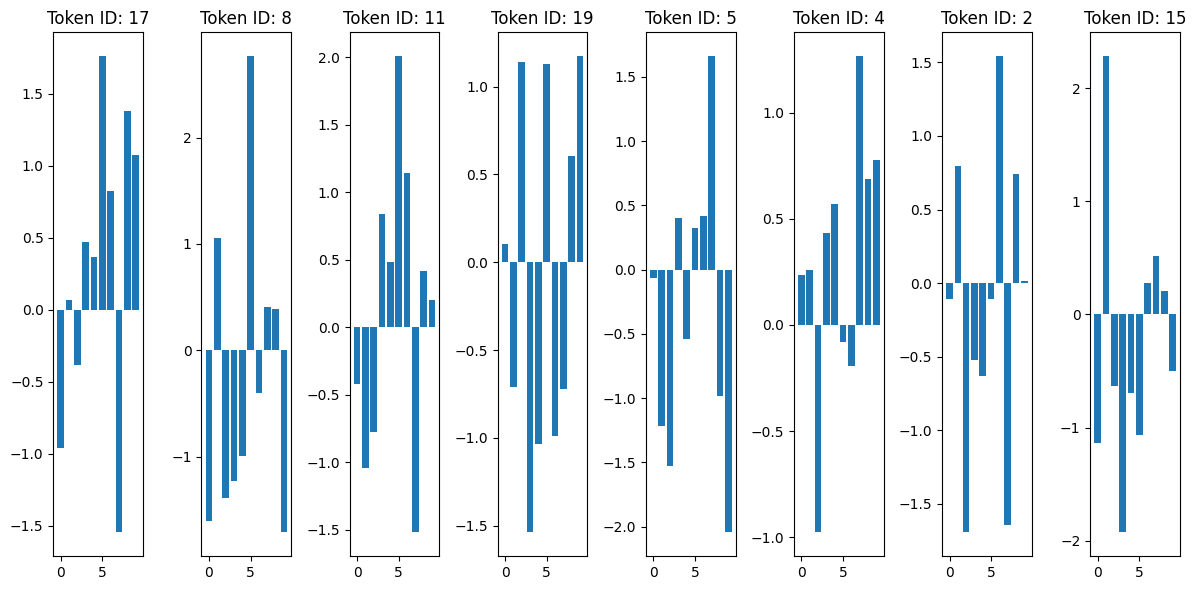

In [6]:
# Visualize embeddings for each token
plt.figure(figsize=(12, 6))
for i in range(token_ids.shape[1]):
    plt.subplot(1, token_ids.shape[1], i+1)
    plt.bar(range(embedding_dim), embedded_tokens[0][i].detach().numpy())
    plt.title(f"Token ID: {token_ids[0][i]}")
plt.tight_layout()
plt.show()

**Calculating the Highest Magnitude among all tokens:**

In [7]:
token_magnitudes = torch.norm(embedded_tokens, dim=2)
best_token_idx = torch.argmax(token_magnitudes).item()
best_token_id = token_ids[0][best_token_idx].item()
print(f"Token with highest magnitude: Token ID {best_token_id}")
print(f"Its embedding: {embedded_tokens[0][best_token_idx]}")

Token with highest magnitude: Token ID 8
Its embedding: tensor([-1.6046,  1.0596, -1.3929, -1.2296, -0.9955,  2.7657, -0.4056,  0.4048,
         0.3895, -1.7138], grad_fn=<SelectBackward0>)


**Calculating the Max Values on tokens:**

In [8]:
max_values, _ = torch.max(torch.abs(embedded_tokens), dim=2)
best_max_idx = torch.argmax(max_values).item()
best_max_token = token_ids[0][best_max_idx].item()
print(f"Token with highest absolute value: Token ID {best_max_token}")
print(f"Its embedding: {embedded_tokens[0][best_max_idx]}")

Token with highest absolute value: Token ID 8
Its embedding: tensor([-1.6046,  1.0596, -1.3929, -1.2296, -0.9955,  2.7657, -0.4056,  0.4048,
         0.3895, -1.7138], grad_fn=<SelectBackward0>)


**3.	Add Positional Encoding**
Incorporate positional encoding to provide positional information to the model.


In [9]:
def positional_encoding(seq_len, embedding_dim):
    position = np.arange(seq_len)[:, np.newaxis]
    div_term = np.exp(np.arange(0, embedding_dim, 2) * -(np.log(10000.0) / embedding_dim))
    pe = np.zeros((seq_len, embedding_dim))
    pe[:, 0::2] = np.sin(position * div_term)
    pe[:, 1::2] = np.cos(position * div_term)
    return torch.tensor(pe, dtype=torch.float)

seq_len = token_ids.size(1)
pos_encoding = positional_encoding(seq_len, embedding_dim)
print("Positional Encoding:\n", pos_encoding)

Positional Encoding:
 tensor([[ 0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
          1.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00],
        [ 8.4147e-01,  5.4030e-01,  1.5783e-01,  9.8747e-01,  2.5116e-02,
          9.9968e-01,  3.9811e-03,  9.9999e-01,  6.3096e-04,  1.0000e+00],
        [ 9.0930e-01, -4.1615e-01,  3.1170e-01,  9.5018e-01,  5.0217e-02,
          9.9874e-01,  7.9621e-03,  9.9997e-01,  1.2619e-03,  1.0000e+00],
        [ 1.4112e-01, -9.8999e-01,  4.5775e-01,  8.8908e-01,  7.5285e-02,
          9.9716e-01,  1.1943e-02,  9.9993e-01,  1.8929e-03,  1.0000e+00],
        [-7.5680e-01, -6.5364e-01,  5.9234e-01,  8.0569e-01,  1.0031e-01,
          9.9496e-01,  1.5924e-02,  9.9987e-01,  2.5238e-03,  1.0000e+00],
        [-9.5892e-01,  2.8366e-01,  7.1207e-01,  7.0211e-01,  1.2526e-01,
          9.9212e-01,  1.9904e-02,  9.9980e-01,  3.1548e-03,  1.0000e+00],
        [-2.7942e-01,  9.6017e-01,  8.1396e-01,  5.8092e-01,  1.5014e-01,
          

Add the positional encoding to the embedded tokens:

# Plotting the Tokens

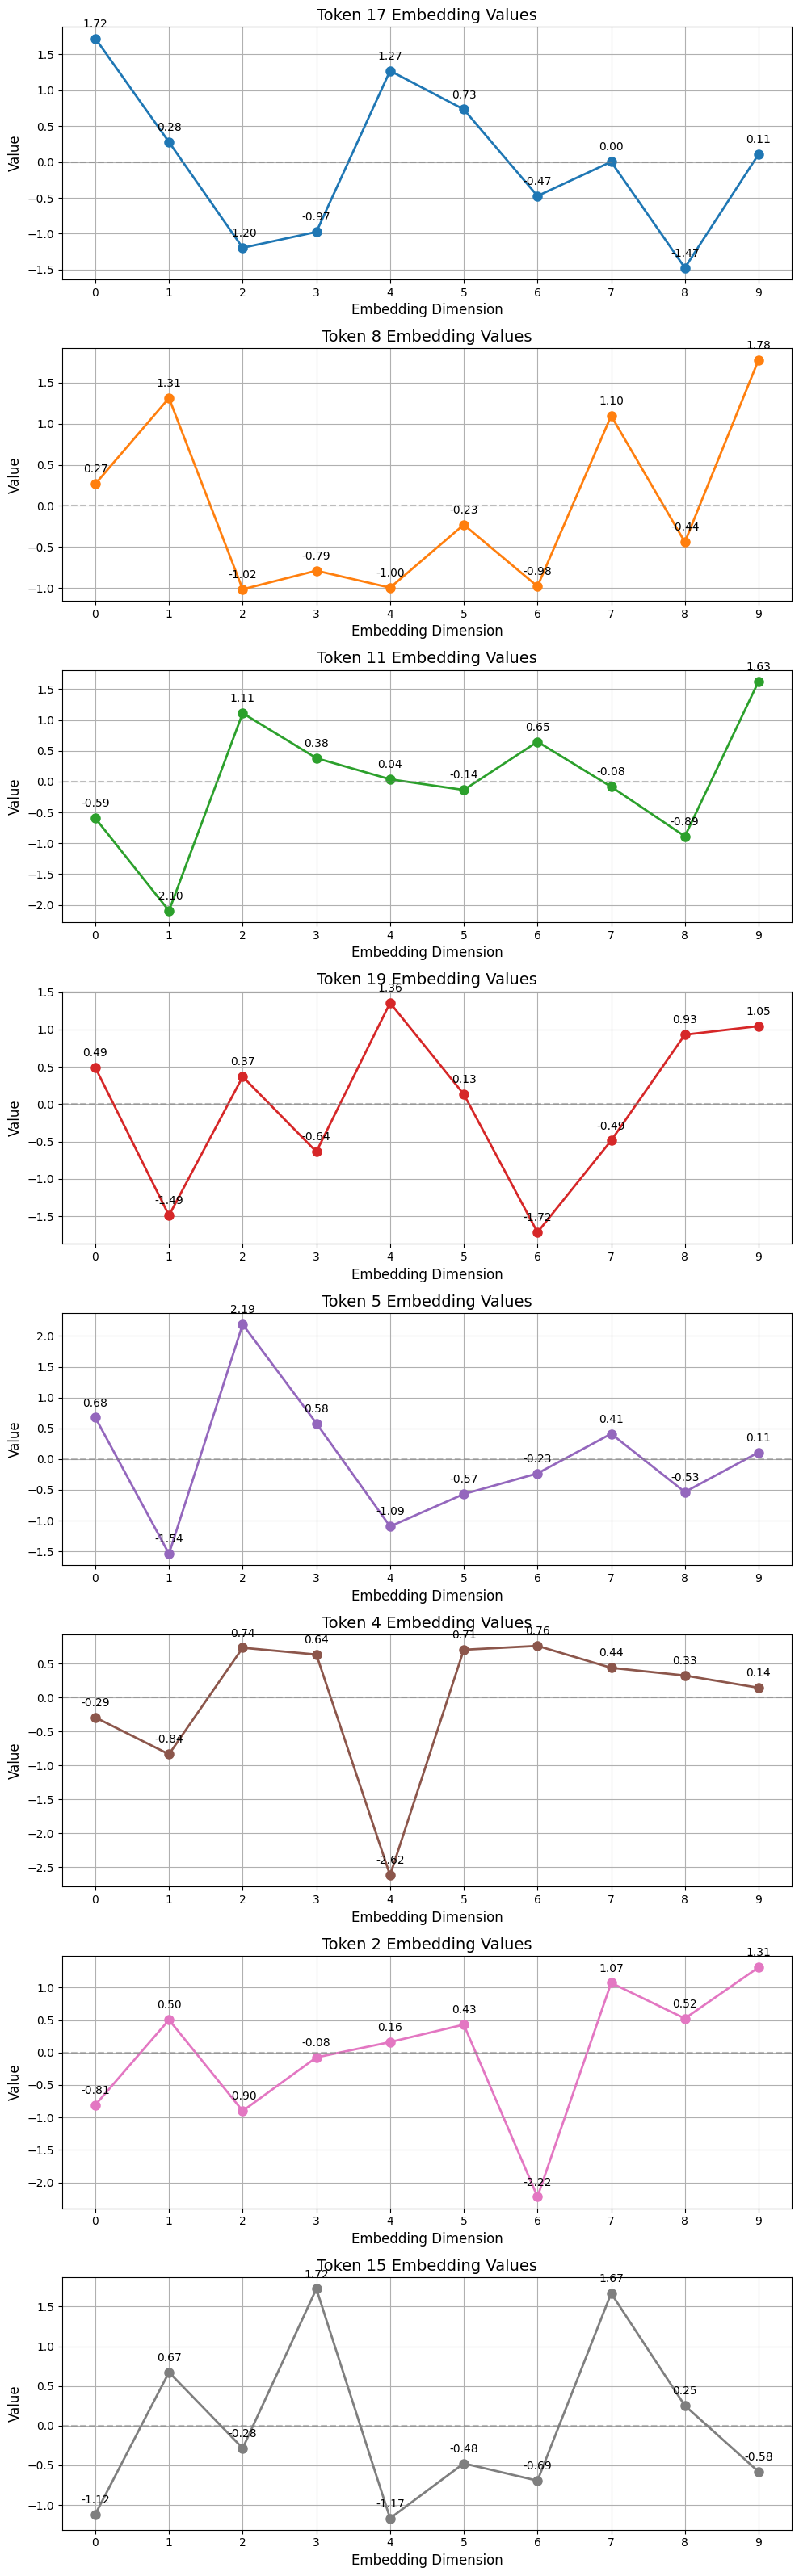

In [40]:
# Create individual plots for each token
num_tokens = token_ids.shape[1]
fig, axes = plt.subplots(num_tokens, 1, figsize=(10, 4*num_tokens))

for i in range(num_tokens):
    # Extract embedding for this token
    token_embed = output[0][i].detach().numpy()
    token_id = token_ids[0][i].item()

    # Plot with both line and markers
    axes[i].plot(token_embed, 'o-', linewidth=2, markersize=8, color=f'C{i}')
    axes[i].grid(True)
    axes[i].set_title(f'Token {token_id} Embedding Values', fontsize=14)
    axes[i].set_xlabel('Embedding Dimension', fontsize=12)
    axes[i].set_ylabel('Value', fontsize=12)

    # Add dimension numbers on x-axis
    axes[i].set_xticks(range(embedding_dim))

    # Add horizontal line at zero
    axes[i].axhline(y=0, color='gray', linestyle='--', alpha=0.5)

    # Add value annotations
    for j, val in enumerate(token_embed):
        axes[i].annotate(f'{val:.2f}',
                         (j, val),
                         textcoords="offset points",
                         xytext=(0,10),
                         ha='center')

plt.tight_layout()
plt.show()

# **Part 4_2: Add a Feedforward Layer**

1.	**Define a Feedforward Neural Network**
Implement a simple feedforward layer as part of the encoder.


In [11]:
feedforward = nn.Sequential(
    nn.Linear(embedding_dim, 16),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(16, embedding_dim)
)
ff_output = feedforward(embedded_with_pos)
print("Feedforward Output:\n", ff_output)

Feedforward Output:
 tensor([[[ 0.3884,  0.4085,  0.3771,  0.3509,  0.0336, -0.2341, -0.0674,
          -0.0069, -0.0344,  0.1447],
         [-0.1045,  0.1527,  0.3384, -0.1904, -0.1175,  0.0164, -0.2624,
          -0.1551,  0.0245, -0.0634],
         [ 0.0250,  0.3232, -0.0672,  0.0293, -0.2198, -0.5897,  0.1964,
          -0.3285,  0.1650,  0.1062],
         [ 0.2181,  0.3676,  0.0086,  0.2243, -0.5103, -0.7913, -0.4101,
          -0.4310, -0.2216, -0.1100],
         [-0.0864,  0.1892,  0.3661, -0.2612, -0.3482, -0.5885, -0.1364,
          -0.2584, -0.0597, -0.0859],
         [ 0.3451,  0.2772,  0.2436,  0.3055, -0.2217, -0.2629, -0.0918,
          -0.2023, -0.2569,  0.2286],
         [ 0.1844,  0.4034,  0.2751,  0.0542, -0.0635,  0.0650, -0.0120,
          -0.0068,  0.1564,  0.0312],
         [ 0.3274,  0.6879,  0.2726, -0.0823,  0.0431,  0.4958, -0.3989,
           0.0633, -0.0276, -0.0873]]], grad_fn=<ViewBackward0>)


# **Part 4_3: Combine the Components into an Encoder Block**

1.	**Define the Encoder Block**
Combine the embedding, positional encoding, and feedforward components into an encoder block.


In [12]:
class TransformerEncoderBlock(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(TransformerEncoderBlock, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.feedforward = nn.Sequential(
            nn.Linear(embedding_dim, 16),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(16, embedding_dim)
        )
        self.layer_norm = nn.LayerNorm(embedding_dim)

    def forward(self, x):
        embed = self.embedding(x)
        pos_enc = positional_encoding(x.size(1), embed.size(2))
        embed_with_pos = embed + pos_enc.unsqueeze(0)
        ff_output = self.feedforward(embed_with_pos)
        return self.layer_norm(embed_with_pos + ff_output)

encoder = TransformerEncoderBlock(vocab_size, embedding_dim)
output = encoder(token_ids)
print("Encoder Output:\n", output)

Encoder Output:
 tensor([[[ 1.7239,  0.2782, -1.1967, -0.9749,  1.2719,  0.7341, -0.4731,
           0.0033, -1.4750,  0.1083],
         [ 0.2665,  1.3120, -1.0156, -0.7886, -0.9963, -0.2295, -0.9796,
           1.0954, -0.4406,  1.7763],
         [-0.5944, -2.0964,  1.1100,  0.3800,  0.0369, -0.1362,  0.6464,
          -0.0837, -0.8880,  1.6254],
         [ 0.4912, -1.4898,  0.3683, -0.6361,  1.3571,  0.1339, -1.7152,
          -0.4865,  0.9310,  1.0460],
         [ 0.6758, -1.5388,  2.1896,  0.5823, -1.0942, -0.5684, -0.2328,
           0.4116, -0.5347,  0.1097],
         [-0.2923, -0.8356,  0.7354,  0.6354, -2.6213,  0.7059,  0.7630,
           0.4392,  0.3255,  0.1448],
         [-0.8070,  0.5031, -0.8985, -0.0756,  0.1611,  0.4294, -2.2202,
           1.0722,  0.5245,  1.3109],
         [-1.1163,  0.6732, -0.2846,  1.7237, -1.1670, -0.4755, -0.6932,
           1.6673,  0.2521, -0.5797]]], grad_fn=<NativeLayerNormBackward0>)


In [45]:
for i in range(embedded_with_pos.shape[1]): # Use the number of tokens (second dimension of the tensor)
  print(f"Token ID: {token_ids[0][i]}")
  print(f"Encoder Output: {output[0][i]}")

Token ID: 17
Encoder Output: tensor([ 1.7239,  0.2782, -1.1967, -0.9749,  1.2719,  0.7341, -0.4731,  0.0033,
        -1.4750,  0.1083], grad_fn=<SelectBackward0>)
Token ID: 8
Encoder Output: tensor([ 0.2665,  1.3120, -1.0156, -0.7886, -0.9963, -0.2295, -0.9796,  1.0954,
        -0.4406,  1.7763], grad_fn=<SelectBackward0>)
Token ID: 11
Encoder Output: tensor([-0.5944, -2.0964,  1.1100,  0.3800,  0.0369, -0.1362,  0.6464, -0.0837,
        -0.8880,  1.6254], grad_fn=<SelectBackward0>)
Token ID: 19
Encoder Output: tensor([ 0.4912, -1.4898,  0.3683, -0.6361,  1.3571,  0.1339, -1.7152, -0.4865,
         0.9310,  1.0460], grad_fn=<SelectBackward0>)
Token ID: 5
Encoder Output: tensor([ 0.6758, -1.5388,  2.1896,  0.5823, -1.0942, -0.5684, -0.2328,  0.4116,
        -0.5347,  0.1097], grad_fn=<SelectBackward0>)
Token ID: 4
Encoder Output: tensor([-0.2923, -0.8356,  0.7354,  0.6354, -2.6213,  0.7059,  0.7630,  0.4392,
         0.3255,  0.1448], grad_fn=<SelectBackward0>)
Token ID: 2
Encoder Outpu

In [34]:
for i in range(embedded_with_pos.shape[1]): # Use the number of tokens (second dimension of the tensor)
  print(f"Token ID: {token_ids[0][i]}")
  print(f"Embedding: {embedded_with_pos[0][i]}")

Token ID: 17
Embedding: tensor([-0.9564,  1.0681, -0.3828,  1.4680,  0.3683,  2.7594,  0.8239, -0.5459,
         1.3792,  2.0745], grad_fn=<SelectBackward0>)
Token ID: 8
Embedding: tensor([-0.7631,  1.5999, -1.2351, -0.2422, -0.9704,  3.7654, -0.4016,  1.4048,
         0.3902, -0.7138], grad_fn=<SelectBackward0>)
Token ID: 11
Embedding: tensor([ 0.4867, -1.4590, -0.4664,  1.7853,  0.5363,  3.0072,  1.1541, -0.5213,
         0.4166,  1.1986], grad_fn=<SelectBackward0>)
Token ID: 19
Embedding: tensor([ 0.2456, -1.7021,  1.6005, -0.6503, -0.9599,  2.1275, -0.9774,  0.2765,
         0.6073,  2.1741], grad_fn=<SelectBackward0>)
Token ID: 5
Embedding: tensor([-0.8251, -1.8725, -0.9328,  1.2108, -0.4400,  1.3167,  0.4367,  2.6618,
        -0.9833, -1.0451], grad_fn=<SelectBackward0>)
Token ID: 4
Embedding: tensor([-0.7218,  0.5402, -0.2657,  1.1329,  0.6969,  0.9125, -0.1756,  2.2661,
         0.6900,  1.7762], grad_fn=<SelectBackward0>)
Token ID: 2
Embedding: tensor([-0.3901,  1.7554, -0.879

# **Summary**

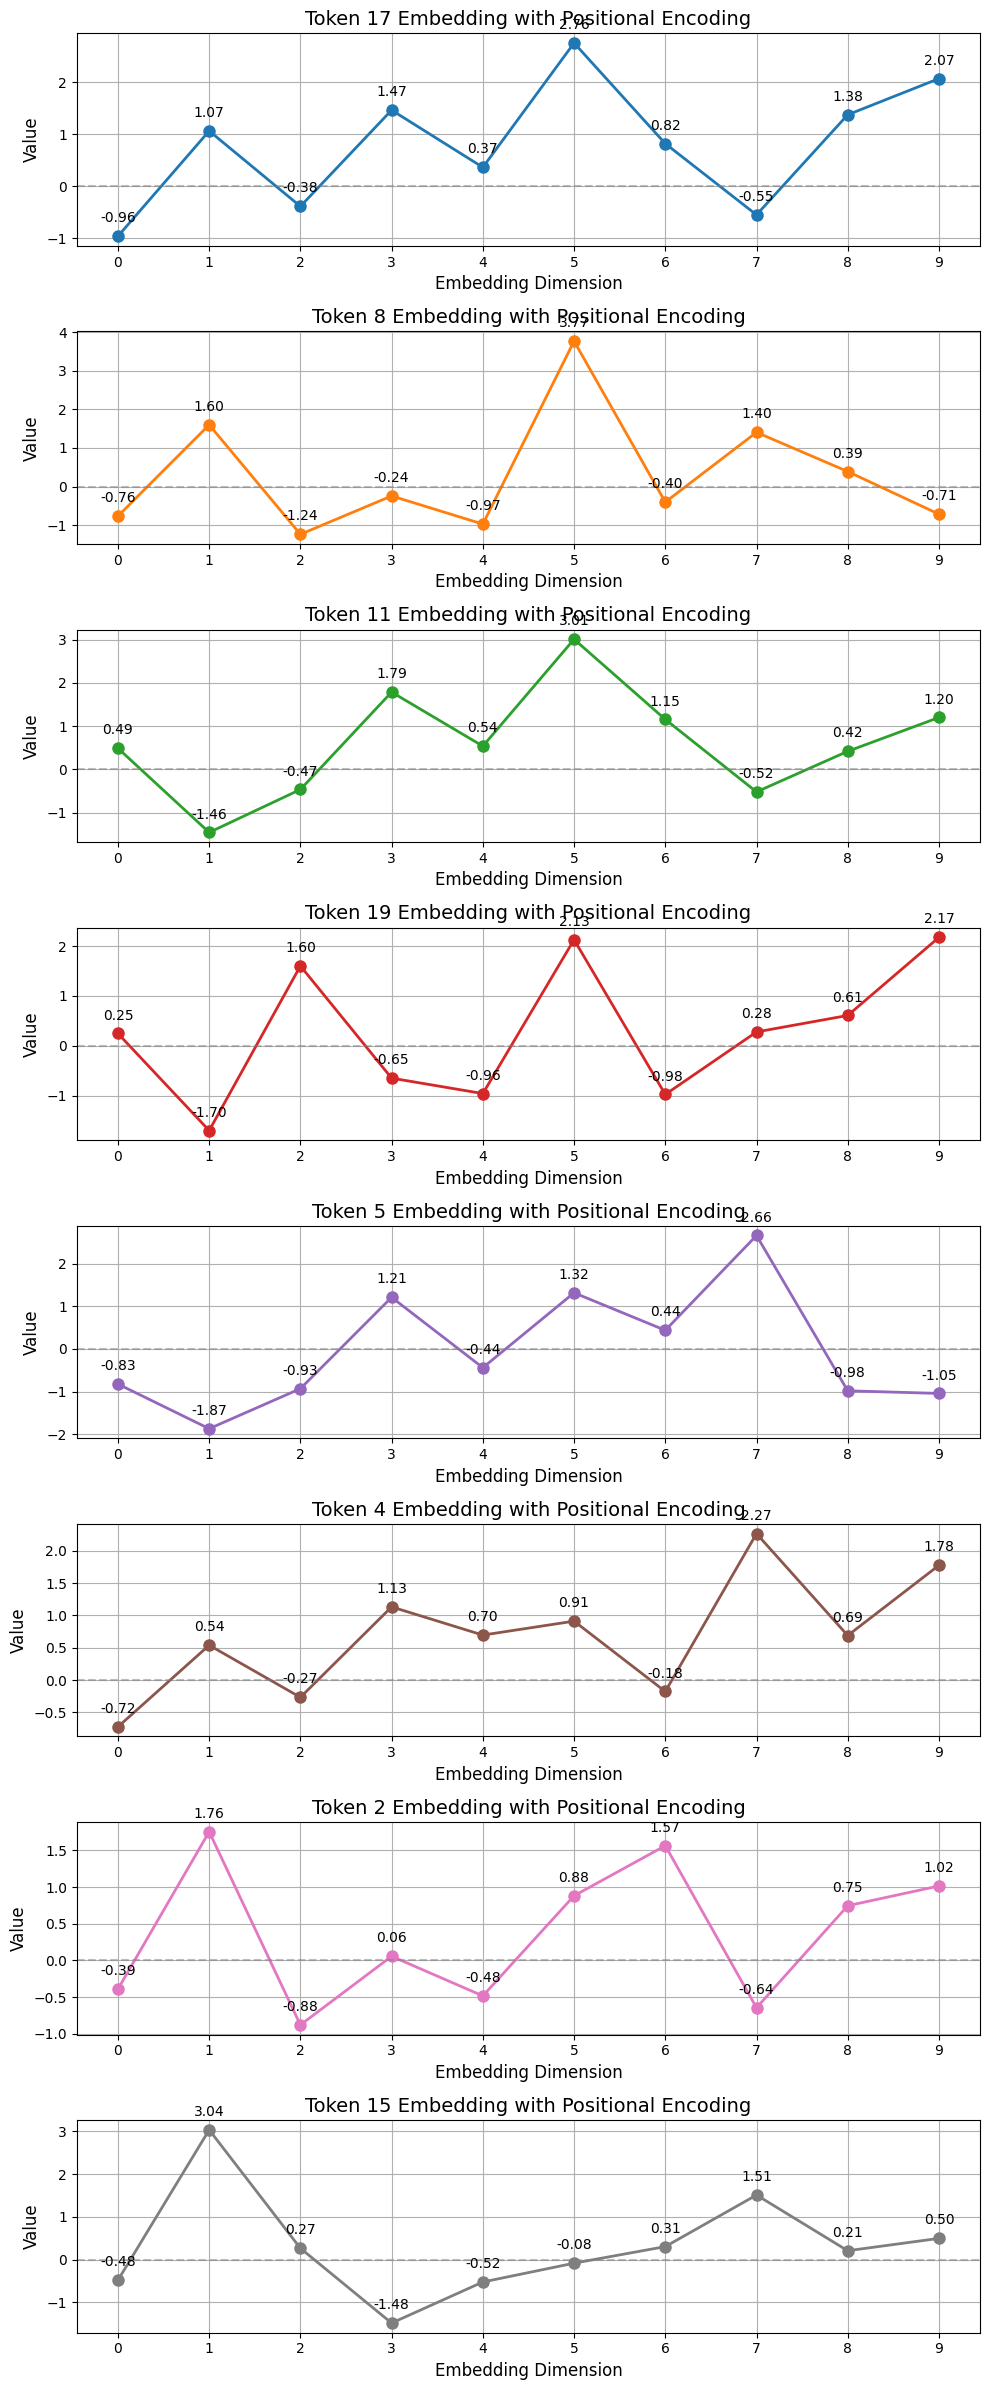

In [38]:
#plotting the Embedded_with_POS

num_tokens = token_ids.shape[1]
fig, axes = plt.subplots(num_tokens, 1, figsize=(10, 3*num_tokens))

for i in range(num_tokens):
    # Extract embedding for this token
    token_embed = embedded_with_pos[0][i].detach().numpy()
    token_id = token_ids[0][i].item()

    # Plot with both line and markers
    axes[i].plot(token_embed, 'o-', linewidth=2, markersize=8, color=f'C{i}')
    axes[i].grid(True)
    axes[i].set_title(f'Token {token_id} Embedding with Positional Encoding', fontsize=14)
    axes[i].set_xlabel('Embedding Dimension', fontsize=12)
    axes[i].set_ylabel('Value', fontsize=12)

    # Add dimension numbers on x-axis
    axes[i].set_xticks(range(embedding_dim))

    # Add horizontal line at zero
    axes[i].axhline(y=0, color='gray', linestyle='--', alpha=0.5)

    # Add value annotations
    for j, val in enumerate(token_embed):
        axes[i].annotate(f'{val:.2f}',
                         (j, val),
                         textcoords="offset points",
                         xytext=(0,10),
                         ha='center')

plt.tight_layout()
plt.show()

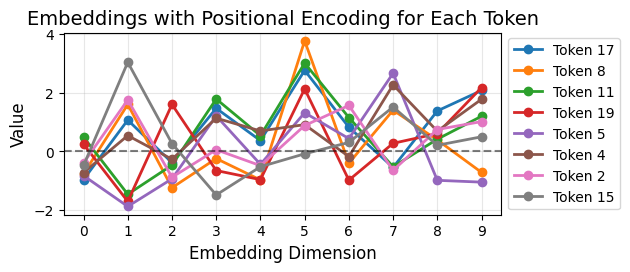

In [35]:
plt.subplot(2, 1, 2)
for i in range(seq_len):
    token_id = token_ids[0][i].item()
    plt.plot(embedded_with_pos[0][i].detach().numpy(), 'o-',
             label=f'Token {token_id}',
             linewidth=2,
             markersize=6)
plt.grid(True, alpha=0.3)
plt.title('Embeddings with Positional Encoding for Each Token', fontsize=14)
plt.xlabel('Embedding Dimension', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.xticks(range(embedding_dim))

plt.tight_layout()
plt.show()

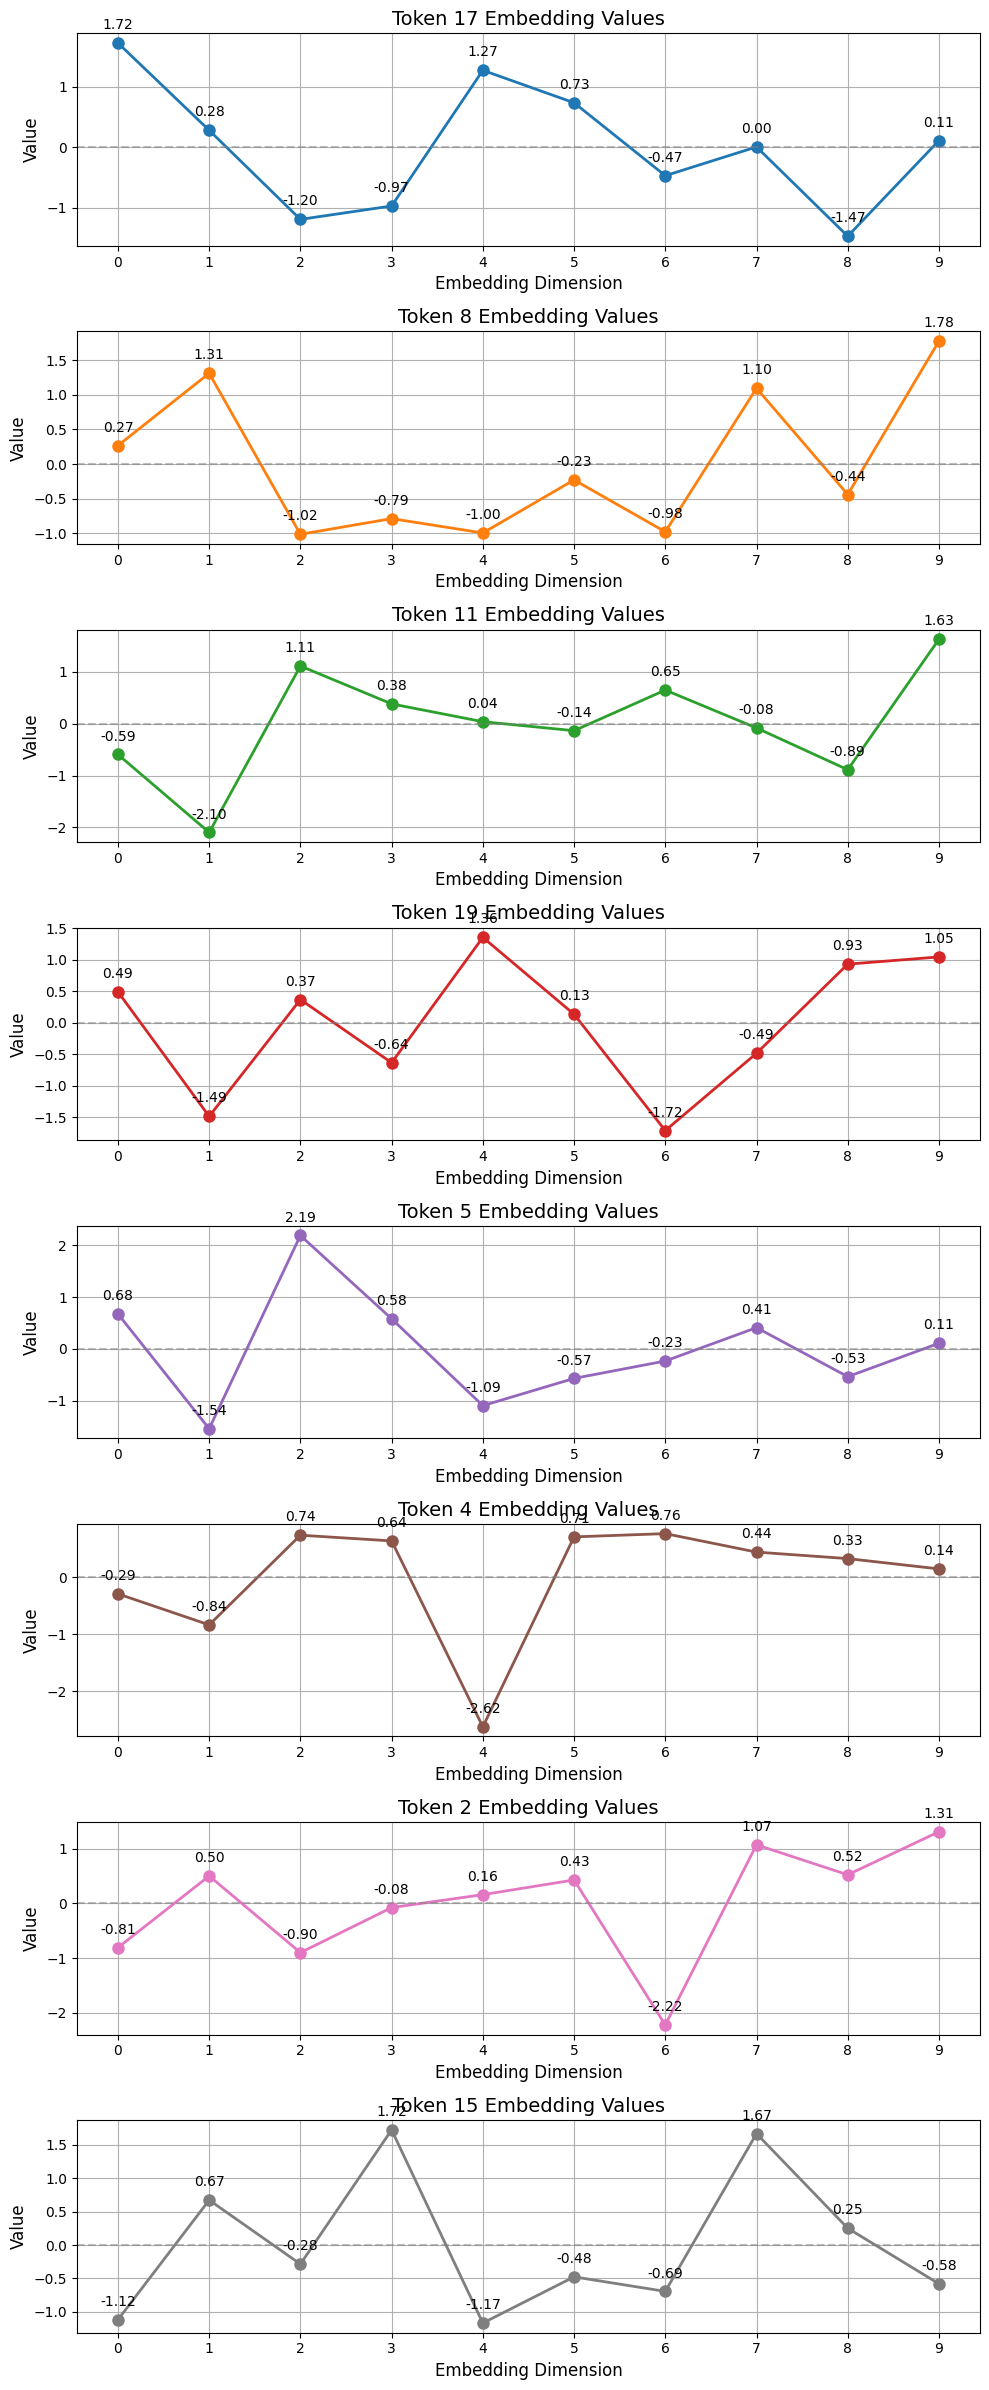

In [47]:
#plotting the Embedded_dimension
num_tokens = token_ids.shape[1]
fig, axes = plt.subplots(num_tokens, 1, figsize=(10, 3*num_tokens))

for i in range(num_tokens):
    # Extract embedding for this token
    token_embed = output[0][i].detach().numpy()
    token_id = token_ids[0][i].item()

    # Plot with both line and markers
    axes[i].plot(token_embed, 'o-', linewidth=2, markersize=8, color=f'C{i}')
    axes[i].grid(True)
    axes[i].set_title(f'Token {token_id} Embedding Values', fontsize=14)
    axes[i].set_xlabel('Embedding Dimension', fontsize=12)
    axes[i].set_ylabel('Value', fontsize=12)

    # Add dimension numbers on x-axis
    axes[i].set_xticks(range(embedding_dim))

    # Add horizontal line at zero
    axes[i].axhline(y=0, color='gray', linestyle='--', alpha=0.5)

    # Add value annotations
    for j, val in enumerate(token_embed):
        axes[i].annotate(f'{val:.2f}',
                         (j, val),
                         textcoords="offset points",
                         xytext=(0,10),
                         ha='center')

plt.tight_layout()
plt.show()

By completing this lab, you have:

* Understood the role of embedding, positional encoding, and feedforward layers in the Transformer encoder.
* Gained hands-on experience implementing a core component of the Transformer architecture.
* Developed a deeper appreciation for the architecture’s design and functionality.

This lab builds foundational knowledge of the Transformer, preparing you for more advanced concepts like self-attention.


# **Steps that i did :**
**Token:**
- token_ids: 17, 8, 11, 19, 5, 4, 2, 15
- vocab_size to 20
- embedding_dim to  10

**Printed the Best:**
- Token with highest magnitude: **Token ID 8**
- Its embedding: tensor best value: **2.7657** at Dimension 6

**Forwarder:**
- added droupout nn.Dropout(0.1),

**Encoder Block**
- added droupout nn.Dropout(0.1)

**After Adding the Droup out the on forwarder and encoder teh best token changed: to:**

- Token with highest magnitude: **Token ID 8**
- Its embedding: tensor best value: **3.75** at Dimension 5

and the embedded positoin dimenion is **Token ID 8** with 1.78 at **dimension 9**
